<a id='top'></a>

# CSCI 3022: Intro to Data Science - Fall 2018 Practicum 
***

This practicum is due on Moodle by **11:55pm on Wednesday December 12**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  

**Here are the rules:** 

1. All work, code and analysis, must be your own. 
1. You may use your course notes, posted lecture slides, textbooks, in-class notebooks, and homework solutions as resources.  You may also search online for answers to general knowledge questions like the form of a probability distribution function or how to perform a particular operation in Python/Pandas. 
1. This is meant to be like a coding portion of your final exam. So, the instructional team will be much less helpful than we typically are with homework. For example, we will not check answers, help debug your code, and so on.
1. If something is left open-ended, it is because we want to see how you approach the kinds of problems you will encounter in the wild, where it will not always be clear what sort of tests/methods should be applied. Feel free to ask clarifying questions though.
2. You may **NOT** post to message boards or other online resources asking for help.
3. You may **NOT** copy-paste solutions *from anywhere*.
4. You may **NOT** collaborate with classmates or anyone else.
5. In short, **your work must be your own**. It really is that simple.

Violation of the above rules will result in an immediate academic sanction (*at the very least*, you will receive a 0 on the practicum or an F in the course, depending on severity), and a trip to the Honor Code Council.

**By submitting this assignment, you agree to abide by the rules given above.**

***

**Name**:  Frank Harvey

***


**NOTES**: 

- You may not use late days on the practicum nor can you drop your practicum grade. 
- If you have a question for us, post it as a **PRIVATE** message on Piazza.  If we decide that the question is appropriate for the entire class, then we will add it to a Practicum clarifications thread. 
- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. 
- Some problems with code may be autograded.  If we provide a function API **do not** change it.  If we do not provide a function API then you're free to structure your code however you like. 
- Submit only this Jupyter notebook to Moodle.  Do not compress it using tar, rar, zip, etc. 
- This should go without saying, but... For any question that asks you to calculate something, you **must show all work to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit.

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p3)

---

In [396]:
from scipy import stats
import numpy as np 
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<br>

---
[Back to top](#top)
<a id='p1'></a>

### [35 points] Problem 1: Yahtzee!

**Part A:** You are playing [Yahtzee](https://en.wikipedia.org/wiki/Yahtzee) with your friends. A player's turn in Yahtzee consists of rolling a set of 5 dice. Then the player is given two additional rolls, where they are allowed to re-roll any number of the dice, including potentially all of them or none of them. The goal is to obtain certain combinations of the dice values resulting after the third roll. Different combinations are worth different amounts of points, and the goal of the game is to get as many points as possible.

This game of Yahtzee is a bit unlike any you have ever played before, however. This is because Darth Ketelsen is back, and with her she brought her famous **5-sided dice**. These are fair dice with sides numbered 1-5. So, you are playing Yahtzee with a Sith Lord with 5-sided dice. Indeed, things just got real.

A **straight** in Darth Ketelsen's game consists of 5 values all in a row. For example, the outcome $[1,2,3,4,5]$ is a  straight but the outcome $[1,2,3,4,4]$ is not.

**Do two things:**
1. Compute by hand the probability of rolling a straight in a single roll of all 5 dice. Show all work.
2. Write a simulation to verify the probability that you computed. Run at least 10,000 simulations. 

#### Answer
This probability is pretty straightforward to compute. Let's go one dice at a time:

1. This dice can be anything! 5/5 chance of being right!
2. This dice can be anything other than the value of the first dice, 4/5 chance
3. This dice can be anything other than the value of the first two dice, so a 3/5 chance
4. I think you get it, 2/5 chance
5. Are you still following? 1/5 chance

$$p = \frac{5}{5}*\frac{4}{5}*\frac{3}{5}*\frac{2}{5}*\frac{1}{5} = \frac{5!}{5^5}$$
$$p = 0.0384$$

In [397]:
def straight_sim(ntrial=10000):
    dice = [1,2,3,4,5]
    trials = np.random.choice(dice, size=[ntrial,5])
    count = 0
    for i in trials:
        if 1 in i and 2 in i and 3 in i and 4 in i and 5 in i:
            count+=1
    return count/ntrial

straight_sim()

0.0397

**Part B:** The goal of this problem is to compute the probability of getting a straight using all three of your rolls, instead of just the single roll approach that you computed in Part A. Here, we'll need to implement a strategy so that after the first roll and after the second roll, we keep the dice that get us closer to a straight and re-roll the dice that are not useful for our straight.

For instance, suppose your first roll comes up $[1,2,3,3,3]$. You really want to get that straight! So, you would follow the strategy of saving the $[1,2,3]$ and re-roll two of the threes, hoping for a 4 and 5 to get the straight. Then, for your third roll, you would save as many of the dice as possible that would be part of a straight, and re-roll any remaining dice.

Finish the function below called `dire_straights` to simulate many complete 3-roll turns, and computes the probability of ending your turn with a straight. The only input to the function should be `ntrial`, an integer for the number of turns to simulate. Remember, each turn consists of 3 rolls.

Then, use your function to estimate the probability of a straight after a full turn of Yahtzee. Use at least 10,000 simulations, and comment on the results.

In [398]:
def check_straight(hand):
    if len(list(set(hand))) == 5:
        return True
    return False

def dire_straights(ntrial=10000, debug=False):
    dice = [1,2,3,4,5]
    trials = np.random.choice(dice, size=[ntrial,5])
    count = 0
    for i in trials:
        # roll 1
        if debug:
            print ("First Draw: ",i)
        
        i = list(set(i))
        if debug:
            print("First Filter: ",i)
        
        # roll 2
        for j in range(0,5-len(i)):
            i.append(np.random.choice(dice))
        if debug:
            print("Second Draw: ",i)
        i = list(set(i))
        if debug:
            print("Second Filter: ",i)
        
        # roll 3
        for j in range(0,5-len(i)):
            i.append(np.random.choice(dice))
        if debug:
            print("Third Draw: ",i)
        i = list(set(i))
        if debug:
            print("Third Filter: ",i)
        if check_straight(i):
            if debug:
                print("***** ***** STRAIGHT ***** *****")
            count+=1
    return count/ntrial

print(dire_straights())

0.3029


#### Answer
I'm getting about a 30% success rate. This feels pretty good to me. It seems to me that its pretty common to have at least 3 unique numbers in the first draw, and not uncommon to have four unique numbers by the second draw (a 50% given that three numbers were unique in the first draw), but then we have a 1 in 5 chance of getting the correct final number in this case. And thats only one case. I hardly saw any straights in the first draw, although I saw several straights by the second draw.

**Part C:** Write a simulation to estimate the probability of obtaining a straight if the first roll contains exactly three distinct unique values. For example, a valid first roll could be $[1,5,3,3,3]$ but not $[1,3,3,4,5]$. You are still using the set of 5-sided dice.

In [399]:
def check_unique_3(hand):
    if len(list(set(hand))) >= 3:
        return True
    return False

def dire_straights_unique_3(ntrial=20000, debug=False):
    dice = [1,2,3,4,5]
    goodTrials = ntrial
    trials = np.random.choice(dice, size=[ntrial,5])
    count = 0
    for i in trials:
        # roll 1
        i = list(set(i))
        if check_unique_3(i):
            # roll 2
            for j in range(0,5-len(i)):
                i.append(np.random.choice(dice))
            i = list(set(i))

            # roll 3
            for j in range(0,5-len(i)):
                i.append(np.random.choice(dice))
            i = list(set(i))

            if check_straight(i):
                count+=1
        else:
            goodTrials -= 1
    return count/goodTrials

print(dire_straights_unique_3())

0.3144175188972877


**Part D:** Verify your calculation from Part C by hand. Show all work, and comment on whether the two agree.

*Hint: you will need to consider a variety of different cases - what are all the ways you could end up with a straight, given that your first roll contained exactly 3 unique values?*

#### Answer
I found it easier to work down like this:
* P(straight after 3 moves | 5 unique in first hand) = $1$
* P(straight after 3 moves | 4 unique in first hand) = $1-(\frac{4}{5})^2$ = .36
    * this is because we we have 4 unique dice, and then we just need that last 5 sided dice, and we have 2 chances to get it
    * this can be said as "1 - the probability of *not* getting the unique value we need"
* P(straight after 3 moves | 3 unique in first hand)
    * this is harder to compute as there are two unique values we need. We can get them in a couple ways
        * both in the second roll: $\frac{2}{25}$
        * both in the third roll: $\frac{9}{25}*\frac{2}{25} = \frac{18}{625}$
            * prob that you did *not* get at least one value in roll 2: $\frac{9}{25}$
            * prob that you did get both uniques in last roll: $\frac{2}{25}$
        * one in the second roll, one in the third: $\frac{2}{5}*2*\frac{1}{5} = \frac{4}{25}$
            * basically *either* of the two dice can roll one of the unique values ($\frac{2}{5}*2$) and then one dice must roll the remaining unique value ($\frac{1}{5}$)
    * we can then sum all these up: $\frac{2}{25} + \frac{18}{625} + \frac{4}{25} = .2688$
    
I will also note that these odds are much lower than checking if we have *at least* 3 unique values instead of *exactly* 3 unique values. This is because we discard first-draw straights and getting 4 unique cards on the first draw. Changing my model to the *at least 3 unique in first draw* brings about a 31% success rate.

**Part E:**  Your friend offers you the following deal. Each time your Yahtzee turn (i.e., all three rolls) results in a 5-of-a-kind, she will give you \$5. Each time your Yahtzee turn results in a straight, she will give you \$3. But, she will charge you \$1 for each turn (where a turn includes all 3 rolls of the five 5-sided dice). Should you take this deal? Fully justify your answer using calculations that include expected values. You may include some simulations to estimate relevant probabilities. Clearly state any assumptions you are making in your modeling choices.

#### Answer
Basically I'll run my game by checking if there are 3 repeated values in the first hand. Otherwise I will just go for a straight. This is because a Yahtzee is pretty unlikely compared to a straight: $\frac{5}{5^5} = .0016$ for a Yahtzee vs. $\approx30\%$ for a straight (as modelled in Part B). In most of my simulations I get between -\$800 and -\$300. Interestingly, if I increase the winnings of a Yahtzee to just \$10 I get winnings of between \$1500 and \$2000.

Then I switched to just averaging the winnings from every hand, which gave me an expected value of -\$.05. So If I then play 10000 games, I can expect -\$500.

In [401]:
def filterListRepeat(hand, repeatVal):
    return [x for x in hand if x == repeatVal]

def check_straight(hand):
    if len(list(set(hand))) == 5:
        return True
    return False

def check_yahtzee(hand):
    if len(hand) == 5:
        if len(list(set(hand))) == 1:
            return True
    return False

def gameWithMoney(ntrial=10000, debug=False):
    dice = [1,2,3,4,5]
    trials = np.random.choice(dice, size=[ntrial,5])
    money = 0
    for i in trials:
        money -= 1
        if debug:
            print(i)
        
        # ROLL 1
        iCheck = list(set(i))
        repeat3 = False
        repeatedVal=0
        seekStraight = False
        for j in iCheck:
            if list(i).count(j) >= 3:
                repeat3=True
                repeatedVal = j
        
        if repeat3:
            i = filterListRepeat(i,repeatedVal)
            for j in range(0,5-len(i)):
                i.append(np.random.choice(dice))
            i = filterListRepeat(i,repeatedVal)
            if debug:
                print(i)
            for j in range(0,5-len(i)):
                i.append(np.random.choice(dice))
            if debug:
                print(i)
            if check_yahtzee(i):
                money+=5
        else:
            i = list(set(i))
            for j in range(0,5-len(i)):
                i.append(np.random.choice(dice))
            if debug:
                print(i)
            i = list(set(i))
            for j in range(0,5-len(i)):
                i.append(np.random.choice(dice))
            if debug:
                print(i)
            i = list(set(i))
            if check_straight(i):
                money += 3
    return money

sum = 0
for i in range(10000):
    sum += gameWithMoney(ntrial=1)
print("Single Game Expected Value: ",sum/10000)
print("Earnings after 10,000 hands: ",gameWithMoney(ntrial=10000))

Single Game Expected Value:  -0.0584
Earnings after 10,000 hands:  -486


<br>

---
[Back to top](#top)
<a id='p2'></a>

### [30 points] Problem 2: Sharknado Prediction

Governor Hickenlooper has charged you with the task of assessing the factors associated with sharknado risk in Colorado. As everyone knows, sharknadoes are a leading cause of sharknado-related illness, and you are a world-renowned data/shark scientist.

You decide to use multiple linear regression to understand and predict what factors lead to increased sharknado hazard. Your lead scientist, aptly named Fin, has collected lots of relevant data at a local sharknado hotspot, the Boulder Reservoir[\*](#footnote). The data cover a variety of sharknado-related environmental and other conditions, and you'll find this data in the file `sharknadoes.csv`. 

**Response**: 

- $\texttt{sharknado hazard}$: the hazard of a sharknado, where 1 is very unlikely and 100 is highly likely

**Features**: 

- $\texttt{taunts}$: the number of times over the past year that someone has taunted a shark
- $\texttt{clouds}$: what percentage of the sky was covered by clouds (fraction, 0-1)
- $\texttt{precipitation}$: amount of precipitation in the past 72 hours (inches)
- $\texttt{earthquake}$: the intensity of the most recent earthquake measured in the continental United States
- $\texttt{shark attacks}$: the number of shark attacks within 72 hours prior to the observation
- $\texttt{ice cream sold}$: the number of units of ice cream sold at the beach concession stand 
- $\texttt{misery index}$: an economic indicator for how miserable the average United States citizen is, based on the unemployment rate and the inflation rate. More [here](https://www.stuffyoushouldknow.com/podcasts/whats-the-misery-index.htm) and [here](https://en.wikipedia.org/wiki/Misery_index_(economics)). Higher values correspond to more miserable citizens.
- $\texttt{temperature}$: the outside temperature, measured in degrees Fahrenheit
- $\texttt{humidity}$: relative humidity (percent, 0-100)
- $\texttt{pizzas sold}$: the number of pizzas sold at the beach concession stand in the past year
- $\texttt{pressure}$: local air pressure (millibar) 
- $\texttt{octopuses}$: the number of octupuses in the vicinity on the day of the observation
- $\texttt{Dan's shoe size}$: the size of the shoes Dan was wearing when the observation was made
- $\texttt{Tony's shoe size}$: the size of the shoes Tony was wearing when the observation was made

**Part A**: Read the data from `sharknadoes.csv` into a Pandas DataFrame.  Note that since we will be doing a multiple linear regression we will need all of the features, so you should drop any row in the DataFrame that is missing data. 

In [402]:
dfShark = pd.read_csv('data/sharknadoes.csv').dropna()
dfShark.head()

,clouds,earthquake,pizzas sold,taunts,pressure,shark attacks,octopuses,precipitation,misery index,ice cream sold,humidity,temperature,Dans shoe size,Tonys shoe size,sharknado hazard
0,1.00,7.1,5560.0,15.0,847.12,2.0,7.0,0.824059,12.987180,273.0,86.41,78.0,42.0,9.0,40.22
1,1.00,7.4,5179.0,20.0,844.34,4.0,5.0,0.993296,16.765435,184.0,96.67,89.0,42.0,9.5,36.42
2,1.00,7.0,5227.0,0.0,839.48,9.0,2.0,1.173342,16.494518,141.0,53.85,65.0,9.5,9.0,19.54
3,0.13,7.9,5226.0,34.0,851.28,2.0,6.0,0.919291,8.277176,146.0,88.72,36.0,9.5,10.0,85.00
4,1.00,7.5,5491.0,6.0,852.67,2.0,4.0,1.729127,5.904750,178.0,63.08,72.0,42.0,9.0,56.34


**Part B**: Perform the appropriate statistical test at the $\alpha = 0.01$ significance level to determine if _at least one_ of the features is related to the the response $y$.  Clearly describe your methodology and show all computations in Python. 

#### Answer
By looking at the OLS model summary, I initially saw that `earthquake`, `taunts`, `pressure`, `temperature` got values of 0.000 in their `P>|t|` columns. Of course we saw in notebook23 that this can easily be misled by PMC due to the number of features, but I noted them anyways. I also noted that `earthquake`, `taunts`, `pressure`, and `temperature` all had 95% confidence intervals that did not include 0. However when I ran `dfShark.corr()["sharknado hazard"]` to see the correlation each feature had with the response I saw that when `clouds`, `earthquake`, `pressure`, and `temperature` had the highest levels of correlation (when taking the absolute value). Again, I made note of these.

When loading all the features into a model we get a F-statistic of 179.4 and a P(F-statistic) of 9.60e-42 (which is far less than our alpha value. This tells me that at least one of the features is very important, and that we `can` reject the Null Hypothesis that the features are not predictors.

I then tried our model with only the features that produced high correlation values (again after taking the absolute value). This produced an F-statistic of 316.5 and a P(F-statistic) of 1.02e-42. This seemed very promising. I did however notice that `clouds` had a `P>|t|` of 0.223 in this scenario. Loading one at a time I got:
* `clouds`
    * F-Statistic: 7.279
    * P(F-statistic): 0.00874
    * P(F-statistic)$<\alpha$: True
    * `P>|t|`: 0.009
* `earthquake`
    * F-Statistic: 9.850
    * P(F-statistic): 0.00249
    * P(F-statistic)$<\alpha$: True
    * `P>|t|`: 0.002
* `pressure`
    * F-Statistic: 235.2
    * P(F-statistic): 4.48e-24
    * P(F-statistic)$<\alpha$: True
    * `P>|t|`: 0.000
* `temperature`
    * F-Statistic: 7.238
    * P(F-statistic): 0.00892
    * P(F-statistic)$<\alpha$: True
    * `P>|t|`: 0.009

So all of these features seem to be significant at the 0.01 level when loaded seperately, and we can see that `pressure` is far and away the most significant, but `clouds` is not significant when loaded alongside the three other features. I did load `taunts` as it did seem significant when all the features were loaded, but not as significant on its own or when I used the reduced set of features so I left it out.

In [403]:
# print(dfShark.corr()["sharknado hazard"])

# Extract response vector y and feature matrix X from DataFrame
y, X = dfShark["sharknado hazard"], dfShark.iloc[0:,[0,1,4,11]]
yTotal, XTotal = dfShark["sharknado hazard"], dfShark.iloc[0:,0:-1]

# Add constant to X 
X = sm.add_constant(X)
XTotal = sm.add_constant(XTotal)

# Fit OLS model 
model = sm.OLS(y, X).fit() 
modelTotal = sm.OLS(yTotal, XTotal).fit() 

# Print model summary 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       sharknado hazard   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     316.5
Date:                Sun, 09 Dec 2018   Prob (F-statistic):           1.02e-42
Time:                        22:47:24   Log-Likelihood:                -203.65
No. Observations:                  72   AIC:                             417.3
Df Residuals:                      67   BIC:                             428.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -2543.2246     83.226    -30.558      0.000   -2709.344   -2377.105
clouds         -4.2823      3.483     -1.230      0.223     -11.234       2.669
earthquake      2.8525      0.585      4.877      0.000       1.685       4.020
pressure        3.0693      0.099     30.914      0.000       2.871       3.268
temperature    -0.3775      0.065     -5.814      0.000      -0.507      -0.248
==============================================================================
Omnibus:                        1.151   Durbin-Watson:                   2.293
Prob(Omnibus):                  0.563   Jarque-Bera (JB):                0.996
Skew:                          -0.034   Prob(JB):                        0.608
Kurtosis:                       2.428   Cond. No.                     1.42e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.42e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Part C**: Write a function `backward_select(df, resp_str, maxsse)` that takes in the DataFrame (`df`), the name of the column corresponding to the response (`resp_str`), and the maximum desired sum of squared errors (`maxsse`), and returns a list of feature names corresponding to the most important features via backward selection.  Use your code to determine the reduced MLR model with the minimal number of features such that the SSE of the reduced model is less than 570. At each stage in backward selection you should remove the feature that has the highest p-value associated with the hypothesis test for the given slope coefficient $\beta_k \neq 0$.

Your code should clearly indicate which feature was removed in each stage, and the SSE associated with the model fit before the feature's removal. _Specifically, please write your code to print the name of the feature that is going to be removed and the SSE before its removal_. Afterward, be sure to report all of the retained features and the SSE of the reduced model.

**Note**: The point of this exercise is to see if you can implement **backward_select** yourself.  You may of course use canned routines like statmodels OLS, but you may not call any Python method that explicitly performs backward selection.

In [404]:
def backward_select(df, resp_str, maxsse):
    y, X = df["sharknado hazard"], df.iloc[0:,0:-1]
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    sse = model.ssr
    
    while sse <= 570:
        print("SSE: ",model.ssr)
        m = max(list(model.pvalues))
        maxPValIndex = [i for i, j in enumerate(model.pvalues) if j == m][0]
        print("Feature Drop: ",df.iloc[:,maxPValIndex-1].name)
        df = df.drop([df.iloc[:,maxPValIndex-1].name],axis=1)
        print("Remaining Features: ",list(df.iloc[0:,0:-1]))
        print("-------------------------------------------------------------------------------------------------------------\n")
        y, X = df["sharknado hazard"], df.iloc[0:,0:-1]
        X = sm.add_constant(X)
        model = sm.OLS(y, X).fit()
        sse = model.ssr
    
    print("Final SSE: ",sse)
    print("Retained Features: ",list(df.iloc[0:,0:-1]))
    
    return list(df.iloc[0:,0:-1])

backward_select(dfShark,"sharknado hazard",570)

SSE:  532.94367074
Feature Drop:  Tonys shoe size
Remaining Features:  ['clouds', 'earthquake', 'pizzas sold', 'taunts', 'pressure', 'shark attacks', 'octopuses', 'precipitation', 'misery index', 'ice cream sold', 'humidity', 'temperature', 'Dans shoe size']
-------------------------------------------------------------------------------------------------------------

SSE:  533.400341056
Feature Drop:  misery index
Remaining Features:  ['clouds', 'earthquake', 'pizzas sold', 'taunts', 'pressure', 'shark attacks', 'octopuses', 'precipitation', 'ice cream sold', 'humidity', 'temperature', 'Dans shoe size']
-------------------------------------------------------------------------------------------------------------

SSE:  534.687569895
Feature Drop:  octopuses
Remaining Features:  ['clouds', 'earthquake', 'pizzas sold', 'taunts', 'pressure', 'shark attacks', 'precipitation', 'ice cream sold', 'humidity', 'temperature', 'Dans shoe size']
-----------------------------------------------------

['earthquake', 'taunts', 'pressure', 'precipitation', 'temperature']

**Part D**: Write down the multiple linear regression model, including estimated parameters, obtained by your backward selection process. 

In [405]:
y, X = dfShark["sharknado hazard"], dfShark.iloc[0:,[1,3,4,7,11]]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       sharknado hazard   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     534.2
Date:                Sun, 09 Dec 2018   Prob (F-statistic):           6.01e-52
Time:                        22:47:32   Log-Likelihood:                -177.21
No. Observations:                  72   AIC:                             366.4
Df Residuals:                      66   BIC:                             380.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2562.6332     57.989    -44.191      0.000   -2678.413   -2446.854
earthquake        2.2341      0.418      5.343      0.000       1.399       3.069
taunts            0.3231      0.037      8.638      0.000       0.248       0.398
pressure          3.0872      0.069     44.618      0.000       2.949       3.225
precipitation     1.2388      0.890      1.392      0.168      -0.538       3.015
temperature      -0.4353      0.022    -20.150      0.000      -0.478      -0.392
==============================================================================
Omnibus:                        1.693   Durbin-Watson:                   2.261
Prob(Omnibus):                  0.429   Jarque-Bera (JB):                1.422
Skew:                           0.344   Prob(JB):                        0.491
Kurtosis:                       2.967   Cond. No.                     1.42e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.42e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Answer
Its worth pointing out the features that did not hold over from my guess in part A. My backwards selection function did not return `clouds` which was one of my early guesses, but did return `earthquake`, `pressure`, and `temperature` which were in my early guesses as well as `precipitation` and `taunts`. I will also note that `taunts` was on my radar, but I did not think it was significant so I left it out, but backwards selection has decided it is important!

With these features we have quite a large F-statistic with a very low P(F-statistic).

**Part E**: Perform the appropriate statistical test at the $\alpha = 0.01$ significance level to determine whether there is a statistically significant difference between the full model with all features and the reduced model obtained by backward selection in **Part D**. You may use output from your model fit above, but all calculations should be set up in Markdown/MathJax.

#### Answer
As seen in the model summary from Part D, with this reduced set of features our P(F-statistic) is very low,  lower than $0.01$ by nearly 50 orders of magnitude. This isn't saying much actually, since our full feature set had a P(F-statistic) of about only 10 orders of magnitude higher than our reduced set, still 40 orders of magnitude smaller than our $\alpha$ value. However, $.01 ^ 10$ is significant at the .01 level (lol) so I will use my reduced model for part E.

**Part F**: Based on your conclusions in **Part E**, use the _better_ of the two models to predict the sharknado hazard when the following features are observed: 

- $\texttt{taunts}$: 47
- $\texttt{clouds}$: 0.8
- $\texttt{precipitation}$: 1 inch
- $\texttt{earthquake}$: 5
- $\texttt{shark attacks}$: 11
- $\texttt{ice cream sold}$: 120
- $\texttt{misery index}$: 15
- $\texttt{temperature}$: 70 degrees F
- $\texttt{humidity}$: 83
- $\texttt{pizzas sold}$: 5500
- $\texttt{pressure}$: 850 millibar 
- $\texttt{octopuses}$: 6
- $\texttt{Dan's shoe size}$: 9.5
- $\texttt{Tony's shoe size}$: 9

In [406]:
dfPredict = pd.DataFrame(columns=['clouds', 'earthquake', 'pizzas sold', 'taunts', 'pressure', 'shark attacks', 'octopuses', 'precipitation', 'misery index', 'ice cream sold', 'humidity', 'temperature', 'Dans shoe size', 'Tonys shoe size'], data=[[0.8,5,5500,47,850,11,6,1,15,120,83,70,9.5,9]])
dfPredictReduced = dfPredict.iloc[0:,[1,3,4,7,11]]
dfPredictReduced = sm.add_constant(dfPredictReduced, has_constant='add')
dfPredict = sm.add_constant(dfPredict, has_constant='add')

print("Reduced Model Prediction: ",model.predict(dfPredictReduced)[0])
print("Full Model Prediction: ", modelTotal.predict(dfPredict)[0])

Reduced Model Prediction:  58.5838331984
Full Model Prediction:  55.7187230351


**Part G:** Consider the model you used in Part E, and consider the fact that you are trying to predict **sharknado hazard**. What is one critical drawback to the MLR model (or any MLR model) for predicting shardnado hazard? What are some modifications that could improve on this issue?

#### Answer
One draw back of any MLR model is that not all predictors have a linear relationship with the repsonse. Similarly, it can be hard to pick out what is truly a predictor as opposed to something that is just correlated with the response. Another drawback is that a predictor might have a complicated relationship with the response. Maybe `shark attacks` is a hugely important predictor, but only when its not raining. Or maybe `pizzas sold` influences the barometric pressure which is an important predictor. MLR's don't inherently allow us to dive into a deeper relationship between these features. 

<br>

---
[Back to top](#top)
<a id='p3'></a>

### [35 points] Problem 3: FlipMaster5000

In the file `flips.csv` you'll find the results of an experiment that was conducted with Stella O'Flaherty (the famous octopus data scientist) flipping coins. Her experiment was as follows. 

1. She reaches into her coin purse and grabs one of two coins, labeled $x$ and $y$. 
2. She flips her coin until it comes up heads 8 times, and records the coin ID and the number of flips it took to get 8 heads. 
3. She then replaces the coin in her coin purse and repeats the experiment. 

**Part A:**

By considering the total number of flips and the total number of "heads" in the data file for each coin, estimate the bias of each coin $p_x$ and $p_y$, and use an appropriate statistical test to determine whether the coins have the same bias, i.e. whether $p_x$ and $p_y$ are the same. Perform your test at a significance level that will mistakenly reject the null hypothesis _when that null hypothesis is actually true_ 5% of the time. Report a p-value for your test, and clearly state your conclusions.

#### Answer
My null hypothesis is that the bias of each coin is equal to the other coins' bias:
$$H_{0}: p_x = p_y$$
$$or$$
$$H_{0}: p_x - p_y = 0$$
and my alternate hypothesis is
$$H_{1}: p_x \neq p_y$$
$$or$$
$$H_{1}: p_x - p_y \neq 0$$
since I don't actually care which coin is biased and in which direction, just whether or not they have the same bias. I will calculate the $\hat{p}$ of each and then compare them in a Z test:
$$Z = \frac{\hat{p_{x}}-\hat{p_{y}}}{\sqrt{\hat{p}(1-\hat{p})*(\frac{1}{n_x}+\frac{1}{n_y})}}$$
where $\hat{p}$ is the sample proportion.

In [407]:
dfCoins = pd.read_csv('data/flips.csv', delim_whitespace=True, names=["CoinId", "Flips"], skiprows=[0])
dfCoins

,CoinId,Flips
0,x,9
1,x,13
2,x,12
3,y,12
4,y,20


In [408]:
# number of heads divided by number of flips for x, and then y
n_x = (dfCoins["Flips"][0] + dfCoins["Flips"][1] + dfCoins["Flips"][2])
p_hat_x = (8 + 8 + 8)/n_x
n_y = (dfCoins["Flips"][3] + dfCoins["Flips"][4])
p_hat_y = (8 + 8)/n_y
p_hat_sample = (8*5)/dfCoins["Flips"].sum()
print("p_hat_x: %s" % p_hat_x)
print("p_hat_y: %s" % p_hat_y)
print("p_hat_sample: %s" % p_hat_sample)

Z = (p_hat_x-p_hat_y)/np.sqrt(p_hat_sample*(1-p_hat_sample)*((1/n_x) + (1/n_y)))
alpha = 0.05
zAover2 = stats.norm.ppf(1 - alpha/2)
print("Z of a/2: %.2f" % zAover2)
print("Sample Z: %.2f" % Z)

p_val = (2*stats.norm.cdf((-1) * abs(Z)))
print("alpha: %.2f" % alpha)
print("p_value: %.2f" % p_val)

p_hat_x: 0.705882352941
p_hat_y: 0.5
p_hat_sample: 0.6060606060606061
Z of a/2: 1.96
Sample Z: 1.71
alpha: 0.05
p_value: 0.09


When we solve for Z and perform a p_value test, we cannot reject our null hypothesis as we need $pvalue \leq \alpha$ and we do not have that. So within 95% confidence we **cannot** reject the null hypothesis, although it is close to the edge of the Z-score. For instance, we could reject the null hypothesis within 90% confidence.

However this is **not** what we're looking for, we actually need to *find* a Z score that gives us a p-value of .05. This is just the Z value right out the boundary of 95% confidence: $Z \geq 1.96$. 

**Part B:** 

You learn that, actually, the coin $x$ is from a manufacturer that produces coins whose biases follow some statistical regularity. In particular, the bias of the $x$ coin is in the set $$p_x \in \{0.1, 0.2, 0.3, \dots, 0.9\}.$$ Furthermore, these biases all occur with equal probability. In other words, $\tfrac{1}{9}$ of coins have bias $p_x=0.1$, $\tfrac{1}{9}$ of coins have bias $p_x=0.2$, and so on. 

For each possible value of $p_x$, compute the probability that Stella's $x$ coin has bias of $p_x$, given the data in her data file. 

Plot your results with $p_x$ on the horizontal axis and $Pr(p_x \mid \text{data})$ on the vertical axis. Make the points or lines that you plot blue. Plots without axis labels will receive zero credit.

_Hint_: We have done problems like this before! Think back to how you solved the problem on the midterm where you determined the probability that someone had ESP, given that they guessed the cards correctly. There was a "rule", and maybe a "law" involved in your calculation...

#### Answer
We want to know what the probability of our coin being each element *given* its sample proportion, so we will use **Bayes' Rule** : $$P(A|B) = \frac{P(B|A)P(A)}{P(B)}$$ where $P(A)$ will be each possible manufactered coin (denoted as $P(A_i)$), and $P(B)$ is our sample proportion.

Each $P(A_i)$ is just $\frac{1}{9}$.

$P(B) = 0.705882352941$

$P(B|A)$ will be whether I accept or reject the p-value for each coin in the set: 
$$z_i = \frac {\hat{p}-p_{x_i}} {\sqrt{\frac{p_{x_i}(1-p_{x_i})}{n_x}}}$$
$$pvalue_i = 2 * \phi({-|Z_i|})$$

I'm not 100% sure how to show the probability for each bias in the set. In fact I read [this thread](https://stats.stackexchange.com/questions/275527/using-p-value-to-compute-the-probability-of-hypothesis-being-true-what-else-is) about using Bayes' Theorem to calculate the probability that the null hypothesis is true. People are pretty mixed on that. So for a quick-and-dirty I'll either accept or reject the Null Hypothesis for each bias in the set, and set its probability to 1 or 0 accordingly. This does not give excellent resuslts, as all "accepted" null hypothesis will give equal probability that certainly don't add up to 1, but this was my best guess at an approach.

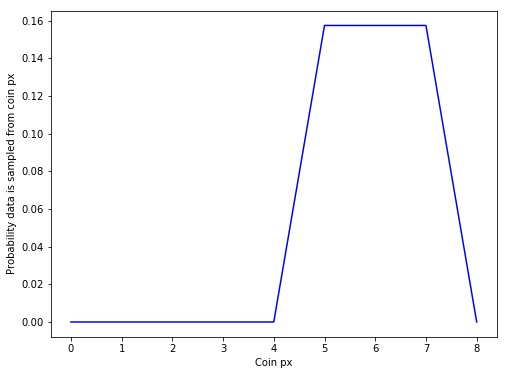

In [409]:
p_x_mfgt = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

n_x = (dfCoins["Flips"][0] + dfCoins["Flips"][1] + dfCoins["Flips"][2])
p_hat_x = (8 + 8 + 8)/n_x

ziX = []
for i in p_x_mfgt:
    ziX.append((p_hat_x-i)/np.sqrt((i*(1-i))/n_x))

alpha = 0.05

resultsX = []
for i in ziX:
    p_val = 2*stats.norm.cdf((-1) * abs(i))
#     print("\n(Z, p-val, alpha): (%.4f,%.10f, %.2f)" % (i,p_val,alpha))
#     print("Reject Null? %s" % ("Yes" if p_val <= alpha else "No"))
    resultsX.append(0 if p_val <= alpha else 1)
    
newResultsX = []
for i in resultsX:
    newResultsX.append((i * 1/9)/p_hat_x)
    
dfResultsX = pd.DataFrame(newResultsX)
figB, ax = plt.subplots(figsize=(8,6))
ax.plot(dfResultsX, color="blue")
ax.set_xlabel("Coin px")
ax.set_ylabel("Probability data is sampled from coin px")

**Part C:**

You learn that, actually, the coin $y$ is from a different manufacturer that produces coins whose biases follow some statistical regularity. In particular, the bias of the $y$ coin is in the set $$p_y \in \{0.1, 0.2, 0.3, \dots, 0.9\}.$$ Furthermore, these biases all occur with different probability. In particular, the probability that a coin has bias $p_y$ is proportional to $p_y$, which could be written as 
$$Pr(p_y) \propto p_y \quad \text{for} \quad p_y \in \{0.1, 0.2, 0.3, \dots, 0.9\}$$

First, write clearly the PMF for $p_y$, based on the information above. 

Then, for each possible value of $p_y$, compute the probability that Stella's $y$ coin has bias of $p_y$, given the data in her data file. 

Plot your results with $p_y$ on the horizontal axis and $Pr(p_y \mid \text{data})$ on the vertical axis. Make the points or lines that you plot red. Plots without axis labels will receive zero credit.

#### Answer
The PMF is
$$\sum[\frac{0.1}{4.5}, \frac{0.2}{4.5}, \frac{0.3}{4.5},\frac{0.4}{4.5},\frac{0.5}{4.5},\frac{0.6}{4.5},\frac{0.7}{4.5},\frac{0.8}{4.5},\frac{0.9}{4.5}]$$
which I got by doing $$\sum_{n=1}^{9}  \frac{\frac{n}{10}} {\sum_{n=1}^{9}\frac{n}{10}}$$
or, in English, just summing 1/10 through 9/10 and then using that sum as a proportion for the probabilities in $p_y$.

I again am not confident in my actual probabilities, as I don't know how to find the probability that the null is true, so I assign accepted Null's to 0 and rejected null's to 1 and calculate in the same way as before, except now I multiply by the probability that the coin was chosen (based on the PMF).

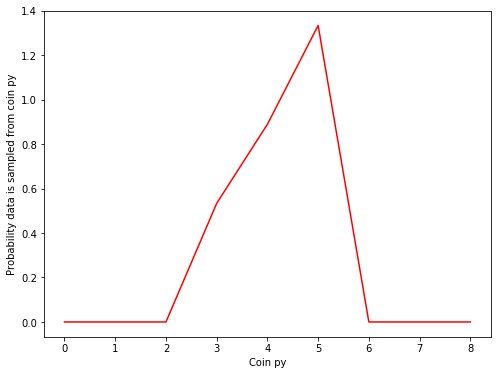

In [410]:
pySetDistr = []
pySetProb = p_x_mfgt
for i in range(1,10):
    pySetDistr.append((i/10)/4.5)

n_y = (dfCoins["Flips"][3] + dfCoins["Flips"][4])
p_hat_y = (8 + 8)/n_y

ziY = []
for i in pySetProb:
    ziY.append((p_hat_y-i)/np.sqrt((i*(1-i))/n_y))

pvalResultsY = []
for i in ziY:
    p_val = 2*stats.norm.cdf((-1) * abs(i))
#     print("\n(Z, p-val, alpha): (%.4f,%.10f, %.2f)" % (i,p_val,alpha))
#     print("Reject Null? %s" % ("Yes" if p_val <= alpha else "No"))
    pvalResultsY.append(0 if p_val <= alpha else 1)
    
newResultsY = []
for i,element in enumerate(pvalResultsY):
    newResultsY.append((i * pySetDistr[i]* element)/p_hat_y)
    
dfResultsY = pd.DataFrame(newResultsY)
figC, ax = plt.subplots(figsize=(8,6))
ax.plot(dfResultsY, color="Red")
ax.set_xlabel("Coin py")
ax.set_ylabel("Probability data is sampled from coin py")

**Part D:**

The information that you have about the manufacturer of coin $x$ and coin $y$ is called _prior information_ since it can influence the estimates of a coin's bias at which you arrive, given the data from the coin's flipping. We often call the distribution $Pr(p_x)$ or $Pr(p_y)$ a _prior distribution_, and call $Pr(p_x \mid \text{data})$ or $Pr(p_y \mid \text{data})$ a _posterior distribution_, since it represents the estimate that you arrive at after you have taken the data into account. 

You have already computed posterior distributions for each coin's bias. However, you'll now investigate the importance of the prior by _switching the priors for the two coins_.

In other words, using the prior probabilities $Pr(p_x)$, what is your posterior distribution of $Pr(p_y \mid \text{data from y})$? Similarly, using the prior probabilities $Pr(p_y)$, what is your posterior distribution of $Pr(p_x \mid \text{data from x})$? 

Create two plots. 

1. In the first plot, show your results from Part B (the posterior distribution for $p_x$ with the correct prior) plotted with a blue solid line as well as your results from Part D for the posterior distribution for $p_x$ with the incorrect prior with a blue dashed line.  

2. In the second plot, show your results from Part C (the posterior distribution for $p_y$ with the correct prior) with a red solid line as well as your results from Part D for the posterior distribution for $p_y$ with the incorrect prior with a red dashed line.  

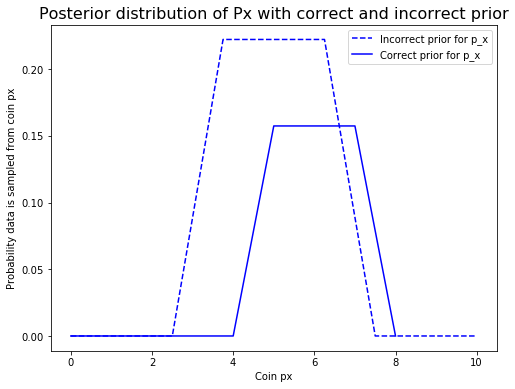

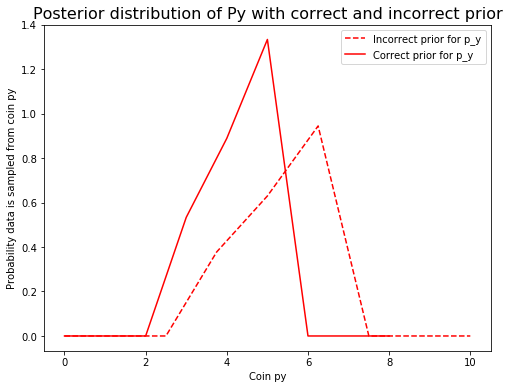

In [411]:
ziWrongX = []
for i in p_x_mfgt:
    ziWrongX.append((p_hat_y-i)/np.sqrt((i*(1-i))/n_y))

resultsWrongX = []
for i in ziWrongX:
    p_val = 2*stats.norm.cdf((-1) * abs(i))
    resultsWrongX.append(0 if p_val <= alpha else 1)
    
newResultsWrongX = []
for i in resultsWrongX:
    newResultsWrongX.append((i * 1/9)/p_hat_y)
    
x = np.linspace(0, 10, 9)
dashes = [10, 5, 100, 5]  # 10 points on, 5 off, 100 on, 5 off
    
dfResultsWrongX = pd.DataFrame(newResultsWrongX)
figDX, ax = plt.subplots(figsize=(8,6))
ax.plot(x, dfResultsWrongX, '--', color="blue", label="Incorrect prior for p_x")
ax.plot(dfResultsX, color="blue", label="Correct prior for p_x")
ax.set_title("Posterior distribution of Px with correct and incorrect prior", fontsize=16)
ax.set_xlabel("Coin px")
ax.set_ylabel("Probability data is sampled from coin px")
ax.legend()

#------------------------------------------------------------------------------------------------------------------------#
#------------------------------------------------------------------------------------------------------------------------#
#------------------------------------------------------------------------------------------------------------------------#

ziWrongY = []
for i in pySetProb:
    ziWrongY.append((p_hat_x-i)/np.sqrt((i*(1-i))/n_x))

pvalResultsYWrong = []
for i in ziY:
    p_val = 2*stats.norm.cdf((-1) * abs(i))
    pvalResultsYWrong.append(0 if p_val <= alpha else 1)
    
newResultsYWrong = []
for i,element in enumerate(pvalResultsYWrong):
    newResultsYWrong.append((i * pySetDistr[i]* element)/p_hat_x)
    
dfResultsYWrong = pd.DataFrame(newResultsYWrong)
figDY, ax = plt.subplots(figsize=(8,6))
ax.plot(x, dfResultsYWrong, '--', color="Red", label="Incorrect prior for p_y")
ax.plot(dfResultsY, color="Red", label="Correct prior for p_y")
ax.set_title("Posterior distribution of Py with correct and incorrect prior", fontsize=16)
ax.set_xlabel("Coin py")
ax.set_ylabel("Probability data is sampled from coin py")
ax.legend()

**Part E:**

What is the name of the distribution that Stella's experiment is drawn from?

<br>

---
[Back to Problem 2](#p2)

<a id='footnote'></a> Yeah yeah - fresh water versus salt water - I know, I know. But sharknadoes also are not real, so...